<a href="https://colab.research.google.com/github/AnushkaSinkhwal/DeepLearning/blob/main/DL_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 19nx4aBDvrMMkUhb_pEqLxN1FffmkfVF1


Downloading...
From: https://drive.google.com/uc?id=19nx4aBDvrMMkUhb_pEqLxN1FffmkfVF1
To: /content/FruitinAmazon.zip
100% 1.24M/1.24M [00:00<00:00, 22.2MB/s]


In [3]:
!unzip /content/FruitinAmazon.zip


Archive:  /content/FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmazon/train

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import random

# Path to your dataset
train_dir = "/content/FruitinAmazon/train"
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_dir))
if not class_names:
  print("No class directories found in the train folder!")
else:
  print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [5]:
from PIL import Image, UnidentifiedImageError
corrupted_images = [] # List to store corrupted images path
# Loop through each class folder and check for corrupted images
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  if os.path.isdir(class_path): # Ensure it’s a valid directory
    images = os.listdir(class_path)
    for img_name in images:
      img_path = os.path.join(class_path, img_name)
      try:
        with Image.open(img_path) as img:
          img.verify() # Verify image integrity
      except (IOError, UnidentifiedImageError):
        corrupted_images.append(img_path)

  # Print results
  if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
     print(img)
  else:
    print("\nNo corrupted images found.")


No corrupted images found.

No corrupted images found.

No corrupted images found.

No corrupted images found.

No corrupted images found.

No corrupted images found.


In [6]:
# Dictionary to store class counts
class_counts = {}
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  if os.path.isdir(class_path):
    images = [img for img in os.listdir(class_path) if img.lower().endswith((".png", ".jpg"
    , ".jpeg"))]
    class_counts[class_name] = len(images) # Count images in each class
# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
  print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [7]:
import random
selected_images = [] # Store image paths
selected_labels = [] # Store corresponding class names
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  if os.path.isdir(class_path):
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg'
    , '.jpeg'))]
    if images: # Ensure the class folder is not empty
      selected_img = os.path.join(class_path, random.choice(images))
      selected_images.append(selected_img)
      selected_labels.append(class_name)

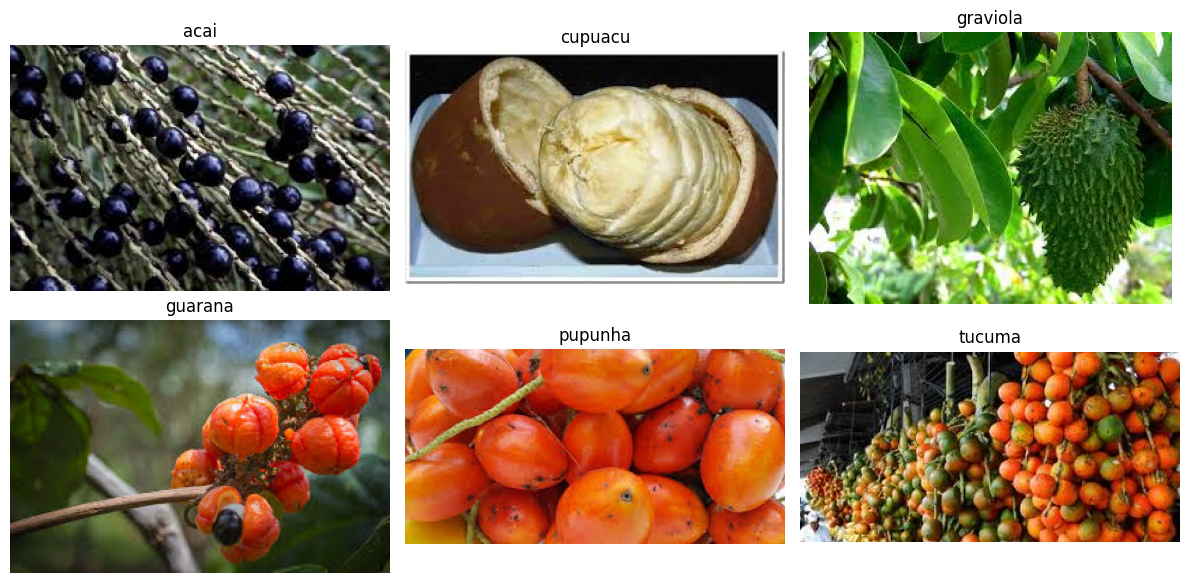

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2 # Determine columns
rows = 2 # Fixed rows for layout
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
  if i < num_classes:
    img = mpimg.imread(selected_images[i])
    ax.imshow(img)
    ax.set_title(selected_labels[i])
    ax.axis("off")
  else:
   ax.axis("off") # Hide empty subplots
plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
image_size = (28, 28)
batch_size = 32
train_ds, val_ds = keras.utils.image_dataset_from_directory(
train_dir,
validation_split=0.2,
subset="both",
seed=1337,
image_size=image_size,
batch_size=batch_size,
)
for images, labels in train_ds.take(1): # Take one batch

  print("Images shape:", images.shape)
  print("Labels shape:", labels.shape)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Using 18 files for validation.
Images shape: (32, 28, 28, 3)
Labels shape: (32,)


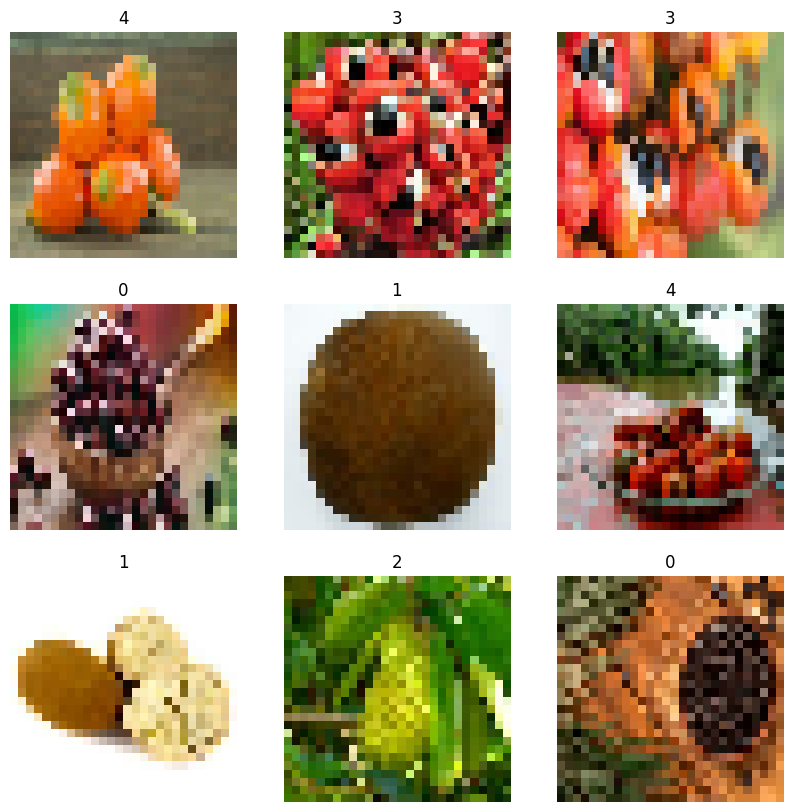

In [10]:
import numpy as np
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): #Takes one batch of images from the dataset (train_ds).
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(images[i]).astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=30, # Rotate images by up to 30 degrees
width_shift_range=0.2, # Shift width by 20%
height_shift_range=0.2, # Shift height by 20%
shear_range=0.2, # Shear transformation
zoom_range=0.2, # Zoom in/out by 20%
horizontal_flip=True, # Flip images horizontally
fill_mode='nearest' # Fill in missing pixels
)



# Task-1

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

#define path and parameters
train_dir = "/content/FruitinAmazon/train"
image_size = (28,28)
batch_size = 32
class_names = sorted(os.listdir(train_dir))

In [13]:
#load dataset with validation split
train_ds, val_ds = utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="both",
    seed= 1337,
    image_size = image_size,
    batch_size=batch_size,
    label_mode='int'
)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Using 18 files for validation.


In [14]:
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense, Lambda, Rescaling

# Data augmentation using Sequential API
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
])

# Define the model
model = Sequential([
    # Data augmentation applied using Lambda layer
    Lambda(lambda x: data_augmentation(x), input_shape=(224, 224, 3)),

    # Rescaling layer
    Rescaling(1./255),

    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fourth Convolutional Block
    Conv2D(256, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten and Fully Connected Layers
    Flatten(),

    Dense(512, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(128, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(64, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output Layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For integer labels
    metrics=['accuracy']
)

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             

 Total params: 26,257,930 (100.17 MB)

 Trainable params: 26,255,050 (100.16 MB)

 Non-trainable params: 2,880 (11.25 KB)

# Task - 2: Transfer learning with VGG16

In [15]:
from tensorflow.keras.applications import VGG16

#Load dataset with VGG16 compatible size
image_size_vgg = (244, 244)
train_ds_vgg, val_ds_vgg = utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size_vgg,
    batch_size=batch_size,
    label_mode='int'
)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Using 18 files for validation.


In [16]:
#Load base model
base_model = VGG16(
    weights= 'imagenet',
    include_top=False,
    input_shape= image_size_vgg + (3,)
)
base_model.trainable = False #Freeze layers

#Add custom classification head
inputs = layers.Input(shape=image_size_vgg + (3,))
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024,activation = 'relu')(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
#Create final model
model = models.Model(inputs, outputs)

#Compile with lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Train the model
history = model.fit(
    train_ds_vgg,
    validation_data=val_ds_vgg,
    epochs=10
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 60s 18s/step - accuracy: 0.0473 - loss: 5.8297 - val_accuracy: 0.1111 - val_loss: 4.1462
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 95s 24s/step - accuracy: 0.2018 - loss: 3.1600 - val_accuracy: 0.1667 - val_loss: 3.4280
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 69s 18s/step - accuracy: 0.4019 - loss: 2.1191 - val_accuracy: 0.1667 - val_loss: 3.2774
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 18s/step - accuracy: 0.6506 - loss: 1.0619 - val_accuracy: 0.4444 - val_loss: 3.1495
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 90s 23s/step - accuracy: 0.7817 - loss: 0.6534 - val_accuracy: 0.4444 - val_loss: 3.0959
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 19s/step - accuracy: 0.9115 - loss: 0.2807 - val_accuracy: 0.4444 - val_loss: 3.1507
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 23s/step - accuracy: 0.9332 - loss: 0.1748 - val_accuracy: 0.5556 - val_loss: 3.1799
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 1.0000 - loss: 0.0841 - val_accuracy: 0.5556 - val_loss: 3.1854


In [18]:

#Evaluate performance
val_loss, val_acc = model.evaluate(val_ds_vgg)
print(f"Validation Accuracy: {val_acc:.4f}%")

#Generate predictions
y_true = np.concatenate([y for x, y in val_ds_vgg], axis=0)
y_pred = np.argmax(model.predict(val_ds_vgg), axis = 1)

#Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5556 - loss: 3.1279
Validation Accuracy: 0.5556%
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step

Classification Report:
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         3
     cupuacu       0.75      0.75      0.75         4
    graviola       0.25      1.00      0.40         1
     guarana       0.00      0.00      0.00         1
     pupunha       0.67      1.00      0.80         4
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.56        18
   macro avg       0.44      0.53      0.42        18
weighted avg       0.61      0.56      0.53        18

